In [1]:
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
from pathlib import Path 
import time
import netCDF4

In [2]:
rn_dic = {
    'Cloud_Optical_Thickness_Liquid_Mean':'COT',
    'Cloud_Effective_Radius_Liquid_Mean': 'r_eff',
    'Cloud_Water_Path_Liquid_Mean': 'CWP',
}

In [3]:
produce_files = [
    'Cloud_Optical_Thickness_Liquid_Mean', 
    'Cloud_Effective_Radius_Liquid_Mean',
    'Cloud_Water_Path_Liquid_Mean',
    'Cloud_Water_Path_Liquid_Mean_Uncertainty',
    'Cloud_Water_Path_Liquid_Standard_Deviation',
    'Cloud_Water_Path_Liquid_Maximum',
    'Cloud_Water_Path_Liquid_Minimum',
]
producw_files_extra=[
    'Cloud_Top_Temperature_Day_Maximum',
    'Cloud_Top_Temperature_Day_Mean',
    'Cloud_Top_Temperature_Day_Minimum',
    'Cloud_Top_Pressure_Day_Mean',
    'Cloud_Top_Pressure_Day_Maximum',
    'Cloud_Top_Pressure_Day_Minimum',
    'Cloud_Top_Height_Day_Mean',
    'Cloud_Top_Height_Day_Maximum',
    'Cloud_Top_Height_Day_Minimum',
    'Cloud_Fraction_Day_Mean',
    'Cloud_Fraction_Day_Maximum',
    'Cloud_Fraction_Day_Minimum',
    'Cloud_Optical_Thickness_Liquid_Maximum',
    #'Cloud_Optical_Thickness_Liquid_Mean',
    'Cloud_Optical_Thickness_Liquid_Mean_Uncertainty',
    'Cloud_Optical_Thickness_Liquid_Minimum',
    'Cloud_Optical_Thickness_Liquid_Standard_Deviation',
    'Cloud_Optical_Thickness_Combined_Mean',
    'Cloud_Optical_Thickness_Combined_Maximum',
    'Cloud_Optical_Thickness_Combined_Minimum',
    'Cloud_Optical_Thickness_Combined_Standard_Deviation',
    'Cloud_Effective_Radius_Liquid_Mean_Uncertainty',
    #'Cloud_Effective_Radius_Liquid_Mean',
]

In [4]:
from bs_fdbck_clean.constants import path_measurement_data

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info


## Settings: 

In [5]:
# path_raw_data = path_measurement_data /'satellite' / 'MODIS_raw'

# path_out_netcdf = path_measurement_data /'satellite' / 'MODIS_netcdf'

path_out_postproc = path_measurement_data /'satellite' / 'MODIS_postproc'
path_out_postproc_lev2 = path_measurement_data /'satellite' / 'MODIS_postproc_lev2'

station = 'SMR'
outfilename = path_out_postproc_lev2 / f'MODIS_date_{station}.nc'


fl = list(path_out_postproc.glob('*.nc'))
fl.sort()

In [6]:
postproc_data = path_measurement_data /'SMEARII'/'processed'
path_station_dataset =postproc_data /'SMEAR_data_comb_hourly.csv'

In [7]:
tau_lims = [5,50]
r_eff_lim = 5
cloud_top_temp_above = -15 
cld_water_path_above = 50
#include_months = [7,8]

from_year = '2012'
to_year = '2018'
daytime_from = 9
daytime_to = daytime_from + 7

In [8]:
daytime_from

9

In [9]:
daytime_from
daytime_to

16

## Set station specifics;

In [10]:
high_perc_OA = 3.02
low_perc_OA = 1.59

In [11]:
lat_lims = [60, 66]
lon_lims = [22,30]

In [12]:
for f in fl:
    print(f)
 


/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2012.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2013.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2014.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2015.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2016.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2017.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2018.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MOD

## Set station specifics;

In [13]:
lat_lims = [60, 66]
lon_lims = [22,30]

In [14]:
tau_lims = [5,50]
r_eff_lim = 5
cloud_top_temp_above = -15 
cld_water_path_above = 60
include_months = [7,8]

## Extract relevant data:

In [15]:
ds_satellite = xr.open_mfdataset(fl).squeeze('band')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


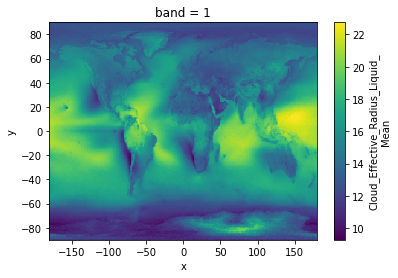

In [16]:
ds_satellite['Cloud_Effective_Radius_Liquid_Mean'].mean('time').plot()

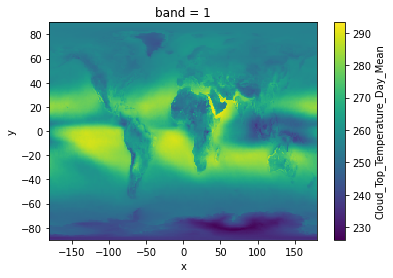

In [17]:
ds_satellite['Cloud_Top_Temperature_Day_Mean'].mean('time').plot()

In [18]:
ds_satellite['month'] = ds_satellite['time.month']
ds_satellite_sum = ds_satellite.where(ds_satellite['month'].isin([7,8]), drop=True)

In [19]:
df_sum = ds_satellite_sum[['Cloud_Effective_Radius_Liquid_Mean']].squeeze().sel(x = slice(*lon_lims), y = slice(*lat_lims[::-1])).to_dataframe()#'band')

In [20]:
df_sum = df_sum.dropna().reset_index()
df_sum.groupby([df_sum['y'],df_sum['x']]).count()

time  Cloud_Effective_Radius_Liquid_Mean  band
y    x                                                   
60.5 22.5   396                                 396   396
     23.5   401                                 401   401
     24.5   392                                 392   392
     25.5   394                                 394   394
     26.5   393                                 393   393
     27.5   384                                 384   384
     28.5   385                                 385   385
     29.5   401                                 401   401
61.5 22.5   399                                 399   399
     23.5   389                                 389   389
     24.5   387                                 387   387
     25.5   385                                 385   385
     26.5   381                                 381   381
     27.5   385                                 385   385
     28.5   389                                 389   389
     29.5   391                                 391   391
62.5 22.5   402                                 402   402
     23.5   387                                 387   387
     24.5   396                                 396   396
     25.5   392                                 392   392
     26.5   389                                 389   389
     27.5   383                                 383   383
     28.5   380                                 380   380
     29.5   387                                 387   387
63.5 22.5   381                                 381   381
     23.5   385                                 385   385
     24.5   390                                 390   390
     25.5   382                                 382   382
     26.5   383                                 383   383
     27.5   391                                 391   391
     28.5   390                                 390   390
     29.5   386                                 386   386
64.5 22.5   324                                 324   324
     23.5   348                                 348   348
     24.5   391                                 391   391
     25.5   398                                 398   398
     26.5   393                                 393   393
     27.5   390                                 390   390
     28.5   387                                 387   387
     29.5   380                                 380   380
65.5 22.5   363                                 363   363
     23.5   352                                 352   352
     24.5   374                                 374   374
     25.5   386                                 386   386
     26.5   394                                 394   394
     27.5   399                                 399   399
     28.5   385                                 385   385
     29.5   378                                 378   378

## Mask values by r_eff, tau, cloud top temperature and cloud water path: 

In [21]:
ds_satellite_mask = ds_satellite.where(ds_satellite['Cloud_Effective_Radius_Liquid_Mean']>=r_eff_lim)
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Optical_Thickness_Liquid_Mean']>tau_lims[0])
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Optical_Thickness_Liquid_Mean']<tau_lims[1])
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Top_Temperature_Day_Mean']>(cloud_top_temp_above+273.15))
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Water_Path_Liquid_Mean']>=cld_water_path_above)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


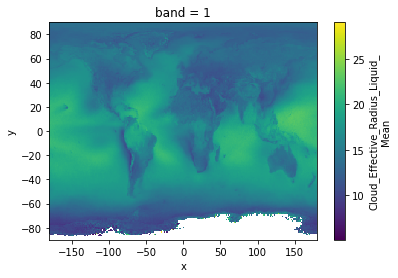

In [22]:
ds_satellite_mask['Cloud_Effective_Radius_Liquid_Mean'].mean('time').plot()

## Mask values by 

In [23]:
ds_satellite_mask['month'] = ds_satellite_mask['time.month']
ds_satellite_mask_sum = ds_satellite_mask.where(ds_satellite_mask['month'].isin([7,8]), drop=True)
df_sum = ds_satellite_mask_sum[['Cloud_Effective_Radius_Liquid_Mean']].squeeze().sel(x = slice(*lon_lims), y = slice(*lat_lims[::-1])).to_dataframe()#'band')
df_sum = df_sum.dropna().reset_index()
df_sum_cnt = df_sum.groupby([df_sum['y'],df_sum['x']]).count()

In [24]:
ds_sat_hyy = ds_satellite_mask.squeeze().sel(x = slice(*lon_lims), y = slice(*lat_lims[::-1]))#.to_dataframe()#'band')

## Get station data: 

In [25]:
path_station_dataset

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/SMEARII/processed/SMEAR_data_comb_hourly.csv')

In [26]:
df_station = pd.read_csv(path_station_dataset, index_col=0)
df_station.index = pd.to_datetime(df_station.index)
df_station

,Year,Month,Day,Hour,Minute,Second,HYY_META.WDU672,HYY_META.WSU168,HYY_META.WSU672,HYY_META.T672,...,N150,N200,N250,N300,density,Org_STP,SO4_STP,NO3_STP,NH4_STP,Chl_STP
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012.0,1.0,1.0,0.0,29.5,0.0,NaN,0.768877,NaN,-6.228155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,2012.0,1.0,1.0,1.0,29.5,0.0,NaN,0.487818,NaN,-5.951797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00,2012.0,1.0,1.0,2.0,29.5,0.0,NaN,0.553307,NaN,-5.993273,...,137.173123,87.040280,52.205053,29.899803,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 03:00:00,2012.0,1.0,1.0,3.0,29.5,0.0,NaN,0.523611,NaN,-5.995248,...,152.428974,96.878629,59.321288,33.998613,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 04:00:00,2012.0,1.0,1.0,4.0,29.5,0.0,NaN,0.540031,NaN,-5.883390,...,189.614898,117.824268,70.343558,39.921649,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
import datetime

In [28]:
from bs_fdbck_clean.constants import path_measurement_data
import pandas as pd

In [29]:
    
def timeround10(dt):
    a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(hours = (dt.hour+a), minutes=b)
    nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year,dt.month, dt.day,) + tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt



def fix_matlabtime(t):
    ind = pd.to_datetime(t-719529, unit='D')
    ind_s = pd.Series(ind)
    return ind_s.apply(timeround10)
    
    


In [30]:
fn_liine = path_measurement_data / 'ACSM_DEFAULT.mat'

In [31]:
columns = ['time', 'Org','SO4','NO3','NH4','Chl']

<AxesSubplot:xlabel='time'>

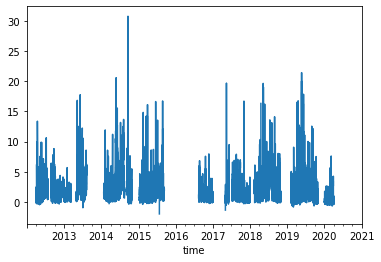

In [32]:
import scipy.io as sio
test = sio.loadmat(fn_liine)

df_lii = pd.DataFrame(test['ACSM_DEFAULT'], columns=columns)#.set_index('time')

df_lii['time'] = fix_matlabtime(df_lii['time']) + datetime.timedelta(hours=1)

df_lii = df_lii.set_index('time')

df_lii['Org'].plot()

In [33]:
df_lii['day_of_year'] = df_lii.index.dayofyear
df_lii['month'] = df_lii.index.month

<AxesSubplot:xlabel='month'>

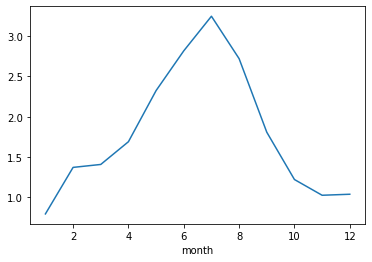

In [34]:
df_lii['Org'][df_lii.index.month.isin(range(0,13))].groupby(df_lii['month']).mean().plot()

In [35]:
df_lii['Org'][df_lii.index.month.isin([6,7,8])].quantile([.32,.64])

0.32    1.591037
0.64    3.025914
Name: Org, dtype: float64

In [36]:
obs_hyy_s = df_lii

In [37]:
obs_hyy_s.loc['2012':'2018']#.quantile([.33,.66])

,Org,SO4,NO3,NH4,Chl,day_of_year,month
time,,,,,,,
2012-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1,1
2012-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,1,1
2012-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,1,1
2012-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,1,1
2012-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,365,12
2018-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,365,12
2018-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,365,12


In [38]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [39]:
import matplotlib.pyplot as plt

(17348.0, 17410.0)

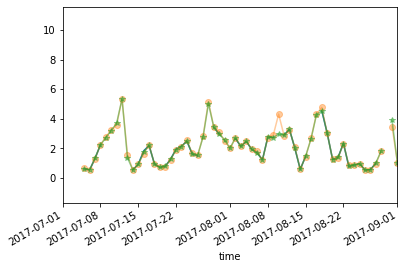

In [40]:
df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot()
df_lii['Org'].resample('1D').median().plot(alpha=.4, marker='o')
df_station['Org_amb'].resample('1D').median().plot(marker='*', alpha=.5)
plt.xlim(['2017-07','2017-09'])

In [41]:
df_lii['hour'] = df_lii.index.hour

In [42]:
df_station['hour'] = df_station.index.hour

In [43]:
df_lii_mh = df_lii[(df_lii['hour']>9) & (df_lii['hour']<19)]
df_station_mh2 = df_station[(df_station['hour']>9) & (df_station['hour']<19)]
df_station_mh = df_station[(df_station['hour']>daytime_from) & (df_station['hour']<daytime_to)]

In [44]:
df_lii_mh_med = df_lii_mh.resample('1D').median()#.loc[df_hyy_1['date']]
#df_lii_msk_mh['Org'].loc[isna['date']] = np.nan

In [45]:
df_lii_msk = df_lii.resample('1D').median()

In [46]:
is_JA = df_lii['month'].isin([7,8])
df_lii[is_JA]['Org'].quantile([0.33, .66])

0.33    1.708664
0.66    3.288182
Name: Org, dtype: float64

In [47]:
df_station['month'] = df_station.index.month
is_JA = df_station['month'].isin([7,8])
df_station[is_JA]['Org_amb'].quantile([0.33, .66])

0.33    1.671895
0.66    3.203285
Name: Org_amb, dtype: float64

<AxesSubplot:ylabel='Frequency'>

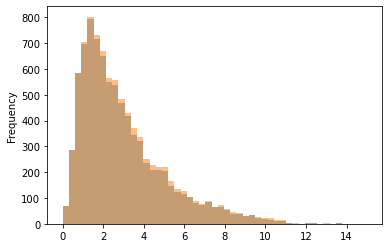

In [48]:
is_JA = df_station['month'].isin([7,8])
df_station[is_JA]['Org_amb'].plot.hist(alpha=.5, bins = np.linspace(0,15), label = 'pre-proc')

is_JA = df_lii['month'].isin([7,8])
df_lii[is_JA]['Org'].plot.hist(alpha=.5, bins = np.linspace(0,15), label='orig')

## Read in the data from Yli-Juuti cloud figures

In [49]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_cld_yli = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_cld_yli.head()



,year,month,day,LAT,LON,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
0,2012,7,5,60.5,22.5,3.218589,191,12.940000,26.219999
1,2012,7,10,60.5,22.5,4.714353,172,10.950000,24.430000
2,2012,7,14,60.5,22.5,1.451827,106,15.790000,12.030000
3,2012,7,19,60.5,22.5,3.101941,262,16.039999,28.650000
4,2012,7,22,60.5,22.5,0.875789,92,10.630000,14.820000


In [50]:
import pandas as pd

In [51]:
df_cld_yli['date'] = df_cld_yli.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_cld_yli['date'] = pd.to_datetime(df_cld_yli['date'] )

In [52]:
df_cld_yli = df_cld_yli.set_index(['date','LAT','LON'])

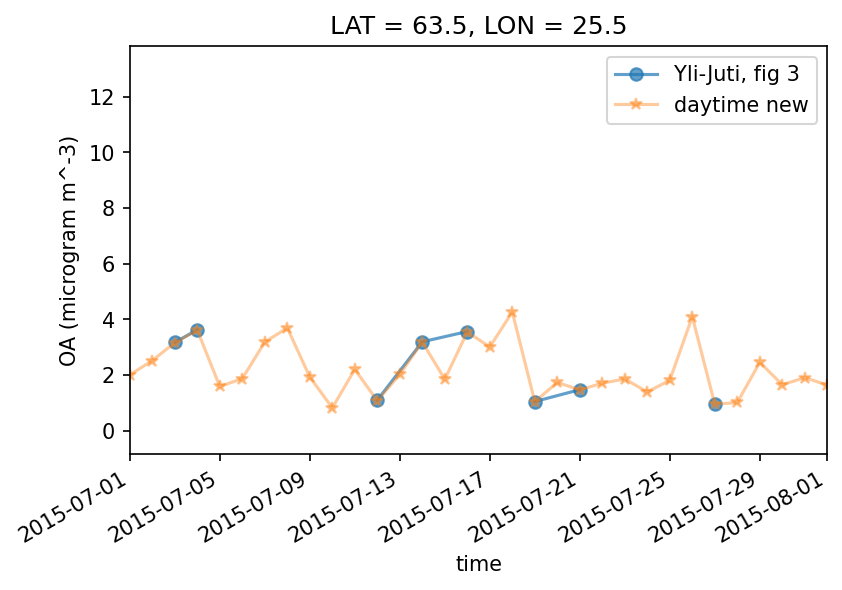

In [53]:
timelist = ['2015-07','2015-08']
df_station_mh2 = df_station[(df_station['hour']>daytime_from) & (df_station['hour']<daytime_to)]



fig = plt.figure(dpi=150)
#df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot(label='Yli-Juuti, fig 1', marker='*', alpha=.1)
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='o', alpha=.7, label='Yli-Juti, fig 3')
#df_lii_msk_mh['Org'].plot(alpha=.4, label='daytime', marker='o')
df_station_mh.resample('1D').median()['Org_amb'].plot(alpha=.4, label='daytime new', marker='*')
#df_lii_msk_mh_last['Org'].plot(alpha=.4, label='daytime', marker='o')

plt.xlim(timelist)
plt.legend()

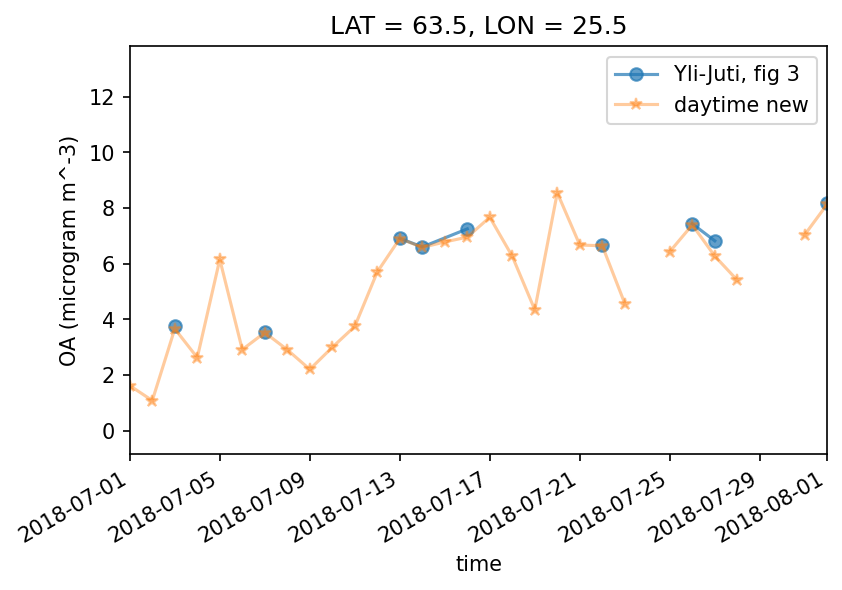

In [54]:
timelist = ['2018-07','2018-08']
df_station_mh2 = df_station[(df_station['hour']>daytime_from) & (df_station['hour']<daytime_to)]



fig = plt.figure(dpi=150)
#df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot(label='Yli-Juuti, fig 1', marker='*', alpha=.1)
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='o', alpha=.7, label='Yli-Juti, fig 3')
#df_lii_msk_mh['Org'].plot(alpha=.4, label='daytime', marker='o')
df_station_mh.resample('1D').median()['Org_amb'].plot(alpha=.4, label='daytime new', marker='*')
#df_lii_msk_mh_last['Org'].plot(alpha=.4, label='daytime', marker='o')

plt.xlim(timelist)
plt.legend()

## Mask by high or low OA: 

<AxesSubplot:xlabel='time'>

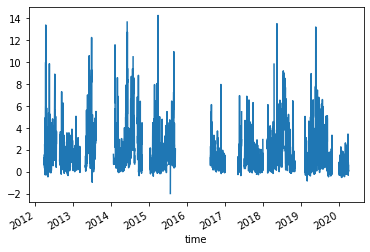

In [55]:
df_station_mh['Org_amb'].plot()

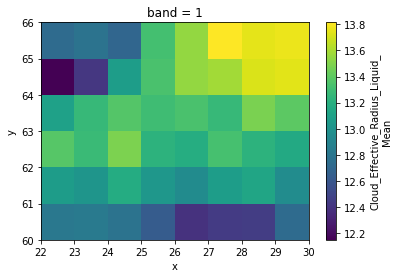

In [56]:
ds_sat_hyy['Cloud_Effective_Radius_Liquid_Mean'].mean('time').plot()

<AxesSubplot:xlabel='hour'>

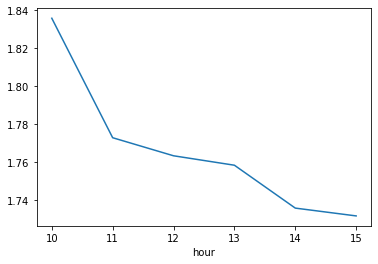

In [57]:
df_station_mh.groupby('hour').mean()['Org_amb'].plot()

### Daily median of station values between 7 and 14 UCT. 

In [58]:
df_station_mh_med = df_station_mh.resample('1D').median()
df_station_mh_med_sum = df_station_mh_med[df_station_mh_med.index.month.isin([7,8])]

In [59]:
df_station_mh_med_sum['Org_amb'].quantile([0.33,0.67])

0.33    1.629831
0.67    3.143295
Name: Org_amb, dtype: float64

In [60]:
df_station_mh_sum = df_station_mh_med[df_station_mh_med.index.month.isin([7,8])]
df_station_mh_sum['Org_amb'].quantile([0.33333,0.66666])

0.33333    1.632779
0.66666    3.137111
Name: Org_amb, dtype: float64

In [61]:
df_station_mh_sum = df_station_mh_med[df_station_mh_med.index.month.isin([7,8])]
df_station_mh_sum['Org_STP'].quantile([0.33333,0.66666])

0.33333    1.852960
0.66666    3.421293
Name: Org_STP, dtype: float64

## Add station values to satellite dataset: 

In [65]:
df_station_mh_med_sum['HYY_META.T168']

time
2012-07-01    19.257653
2012-07-02    18.247258
2012-07-03    19.326519
2012-07-04    20.180375
2012-07-05    22.369723
                ...    
2020-08-27          NaN
2020-08-28          NaN
2020-08-29          NaN
2020-08-30          NaN
2020-08-31          NaN
Name: HYY_META.T168, Length: 558, dtype: float64

In [66]:
ds_sat_hyy['OA_STP'] = df_station_mh_med_sum['Org_STP']
ds_sat_hyy['OA_amb'] = df_station_mh_med_sum['Org_amb']

for v in ['N50','N100','N200','HYY_META.T168']:
    ds_sat_hyy[v] = df_station_mh_med_sum[v]

In [67]:
df_sat_nonan = ds_sat_hyy.to_dataframe().dropna()

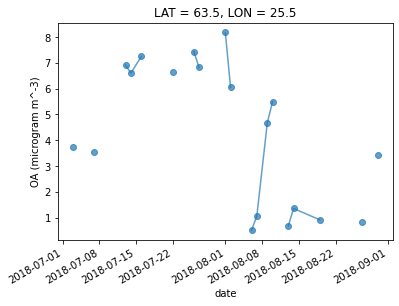

In [68]:
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='o', alpha=.7, label='Yli-Juti, fig 3')

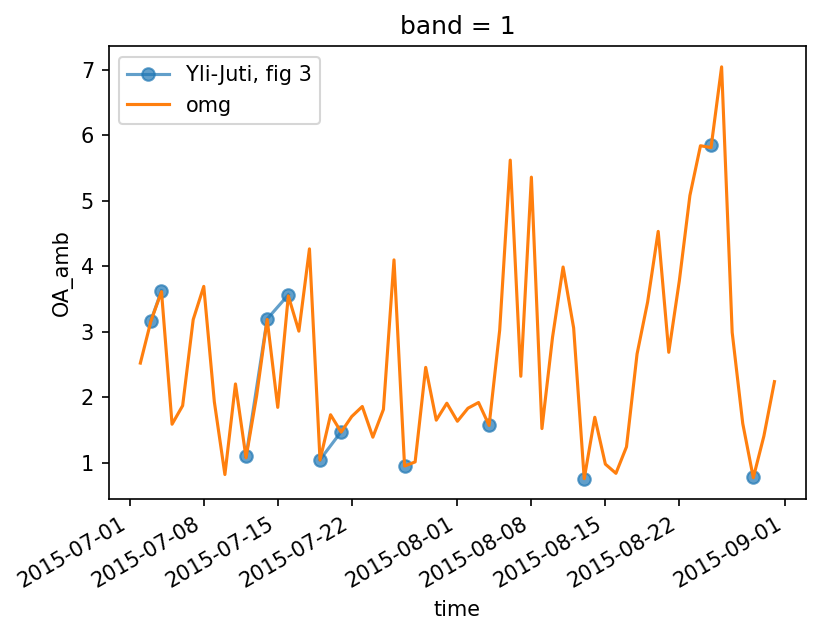

In [69]:
timelist = ['2015-07-02','2015-09-01']
fig = plt.figure(dpi=150)
#df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot(label='Yli-Juuti, fig 1', marker='*', alpha=.1)
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='o', alpha=.7, label='Yli-Juti, fig 3')
ds_sat_hyy['OA_amb'].sel(time=slice(*timelist)).plot(label='omg')
#df_lii_msk_mh_last['Org'].plot(alpha=.4, label='daytime', marker='o')
#
#ax.set_xlim(['2015-07-01','2015-09-01'])

plt.legend()

In [70]:
ds_sat_hyy

<xarray.Dataset>
Dimensions:                                     (time: 2555, y: 6, x: 8)
Coordinates:
  * time                                        (time) datetime64[ns] 2012-01...
  * y                                           (y) float64 65.5 64.5 ... 60.5
  * x                                           (x) float64 22.5 23.5 ... 29.5
    band                                        int64 1
Data variables: (12/17)
    Cloud_Effective_Radius_Liquid_Mean          (time, y, x) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Optical_Thickness_Liquid_Mean         (time, y, x) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Maximum           (time, y, x) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Mean              (time, y, x) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Minimum           (time, y, x) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Maximum             (time, y, x) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    ...                                          ...
    OA_STP                                      (time) float64 nan nan ... nan
    OA_amb                                      (time) float64 nan nan ... nan
    N50                                         (time) float64 nan nan ... nan
    N100                                        (time) float64 nan nan ... nan
    N200                                        (time) float64 nan nan ... nan
    HYY_META.T168                               (time) float64 nan nan ... nan

In [71]:
ds_sat_hyy = ds_sat_hyy.rename({'y':'LAT','x':'LON'}).squeeze()#.to_dataframe().dropna()

In [78]:
ds_sat_hyy

<xarray.Dataset>
Dimensions:                                     (time: 2555, LAT: 6, LON: 8)
Coordinates:
  * time                                        (time) datetime64[ns] 2012-01...
  * LAT                                         (LAT) float64 65.5 64.5 ... 60.5
  * LON                                         (LON) float64 22.5 23.5 ... 29.5
    band                                        int64 1
Data variables: (12/17)
    Cloud_Effective_Radius_Liquid_Mean          (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Optical_Thickness_Liquid_Mean         (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Maximum           (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Mean              (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Minimum           (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Maximum             (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    ...                                          ...
    OA_STP                                      (time) float64 nan nan ... nan
    OA_amb                                      (time) float64 nan nan ... nan
    N50                                         (time) float64 nan nan ... nan
    N100                                        (time) float64 nan nan ... nan
    N200                                        (time) float64 nan nan ... nan
    HYY_META.T168                               (time) float64 nan nan ... nan

## Calculate ACSM data in STP:

## Rename vars

In [80]:
ds_sat_hyy_rn = ds_sat_hyy.rename({'Cloud_Effective_Radius_Liquid_Mean':'CER (micrometer)',
                           'Cloud_Optical_Thickness_Liquid_Mean':'COT',
                           'Cloud_Water_Path_Liquid_Mean':'CWP (g m^-2)',
                          'OA_STP':'OA (microgram m^-3)',
                                   'HYY_META.T168':'T_C',
                          })

In [81]:
ds_sat_hyy_rn

<xarray.Dataset>
Dimensions:                                     (time: 2555, LAT: 6, LON: 8)
Coordinates:
  * time                                        (time) datetime64[ns] 2012-01...
  * LAT                                         (LAT) float64 65.5 64.5 ... 60.5
  * LON                                         (LON) float64 22.5 23.5 ... 29.5
    band                                        int64 1
Data variables: (12/17)
    CER (micrometer)                            (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    COT                                         (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Maximum           (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Mean              (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Top_Temperature_Day_Minimum           (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    Cloud_Water_Path_Liquid_Maximum             (time, LAT, LON) float32 dask.array<chunksize=(366, 6, 8), meta=np.ndarray>
    ...                                          ...
    OA (microgram m^-3)                         (time) float64 nan nan ... nan
    OA_amb                                      (time) float64 nan nan ... nan
    N50                                         (time) float64 nan nan ... nan
    N100                                        (time) float64 nan nan ... nan
    N200                                        (time) float64 nan nan ... nan
    T_C                                         (time) float64 nan nan ... nan

## Save dataset: 

In [82]:
ds_sat_hyy_rn.to_netcdf(outfilename)

In [75]:
outfilename

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/satellite/MODIS_postproc_lev2/MODIS_date_SMR.nc')

In [76]:
df_sat_rn = ds_sat_hyy_rn.squeeze().to_dataframe().dropna()

# Extra analysis

In [77]:
ds_sat_rn = df_sat_rn.to_xarray()